In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi
import pandas as pd

### Question 1
#### 1.a
$Y_{ijk} = \mu_{ij} + \epsilon_{ijk}$

Where:
- $ Y_{ijk} $ is the response variable for the $ i $-th level of factor A, the $ j $-th level of factor B, and the $ k $-th replicate.
- $ \mu_{ij} $ is the mean effect for the combination of the $ i $-th level of factor A and the $ j $-th level of factor B.
- $ \epsilon_{ijk} $ is the random error associated with the $ i $-th level of factor A, the $ j $-th level of factor B, and the $ k $-th replicate

**Assumptions:**
1. Independence: The observations are independent of each other. This means the data collected for one cell does not influence the data collected for another.
2. Normality: The random errors $ \epsilon_{ijk} $ are normally distributed.
3. Homoscedasticity: The error terms $ \epsilon_{ijk} $ have constant variance, denoted as $ \sigma^2 $.
4. Random Sampling: The samples for each group (combination of factor levels) are randomly selected and are representative of the populations.

#### 1.b

a = 3, b = 3, n = 2

**ANOVA Table:**
| Source      | Sum of Squares (SS)                   | Degrees of Freedom (df)     |
|-------------|--------------------------------------|------------------------------|
| Model       | $2.\Sigma\Sigma(\bar{Y}_{ij.} - \bar{Y}_{...})^2$   | ab - 1 = 8    |
| Error       | $\Sigma\Sigma\Sigma(Y_{ijk} - \bar{Y}_{ij.})^2$     | ab(n - 1) = 9 |
| Total       | $\Sigma\Sigma\Sigma(Y_{ijk} - \bar{Y}_{...})^2$     | abn - 1 = 17  |

Where:
- $ Y_{ijk} $ is the observation for the $ i $-th level of factor A, the $ j $-th level of factor B, and the $ k $-th replicate.
- $ \bar{Y}_{ij.} $ is the mean for the $ i $-th level of factor A and the $ j $-th level of factor B.
- $ \bar{Y}_{...} $ is the overall mean of all observations.
- $ a $ and $ b $ are the number of levels in Factor A and Factor B, respectively.
- $ n $ is the number of replicates per cell.

**Null Hypothesis to be tested with this table:**
- All cell means are equal, i.e., there are no effects of the factors or their interaction on the dependent variable.
$ H_0: \mu_{ij} = \mu $ for all $ i $ and $ j $.

#### 1.c
The model can be expressed in matrix form as:  $ Y = X\mu + \epsilon $
1. **Vector Y (Response Vector)**:
   - Y is an 18x1 vector, representing the observations. 
   $$ Y = [Y_{111}, Y_{112}, Y_{121}, Y_{122}, Y_{131}, Y_{132}, Y_{211}, Y_{212}, Y_{221}, Y_{222}, Y_{231}, Y_{232}, Y_{311}, Y_{312}, Y_{321}, Y_{322}, Y_{331}, Y_{332}]^T$$


2. **Design Matrix X**:
   - X is an 18x9 matrix.
   $$
   X =
      \begin{bmatrix}
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
      0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
      0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
      0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
      0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
      0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
      0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
      0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
      0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
      0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
      0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
      0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
      0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
      0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
      \end{bmatrix}
   $$

3. **Vector of Parameters μ (Mean Effects Vector)**:
   - $\mu$ is a 9x1 vector, representing the mean effect for each of the nine combinations of factor levels.
   $$ \mu = [\mu_{11}, \mu_{12}, \mu_{13}, \mu_{21}, \mu_{22}, \mu_{23}, \mu_{31}, \mu_{32}, \mu_{33}]^T$$

4. **Vector of Errors ε (Error Vector)**:
   - ε is an 18x1 vector, representing the error associated with each observation.
   $$ \epsilon = [\epsilon_{111}, \epsilon_{112}, \epsilon_{121}, \epsilon_{122}, \epsilon_{131}, \epsilon_{132}, \epsilon_{211}, \epsilon_{212}, \epsilon_{221}, \epsilon_{222}, \epsilon_{231}, \epsilon_{232}, \epsilon_{311}, \epsilon_{312}, \epsilon_{321}, \epsilon_{322}, \epsilon_{331}, \epsilon_{332}]^T$$

#### 1.d
To write the vector of coefficients $ C $ for the linear regression contrast $ L = \mu_{12} - \mu_{13} $, we need to represent this in terms of the parameter vector $ \mu $. 

$$ \mu = [\mu_{11}, \mu_{12}, \mu_{13}, \mu_{21}, \mu_{22}, \mu_{23}, \mu_{31}, \mu_{32}, \mu_{33}]^T $$

$ L = \mu_{12} - \mu_{13} $ is difference between the mean effects for the second and third level of factor B while holding factor A at its first level.
$$ L = 0 \cdot \mu_{11} + 1 \cdot \mu_{12} - 1 \cdot \mu_{13} + 0 \cdot \mu_{21} + 0 \cdot \mu_{22} + 0 \cdot \mu_{23} + 0 \cdot \mu_{31} + 0 \cdot \mu_{32} + 0 \cdot \mu_{33} $$

The vector of coefficients $ C $ in the linear regression model is:
$$ C = [0, 1, -1, 0, 0, 0, 0, 0, 0]^T $$

#### 1.e
The two-way factor effects model with zero-sum constraints:

$$ Y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \epsilon_{ijk} $$

Where:
- $ Y_{ijk} $ is the response for the $ i $-th level of factor A, the $ j $-th level of factor B, and the $ k $-th replicate.
- $ \mu $ is the overall mean response.
- $ \alpha_i $ is the effect of the $ i $-th level of factor A.
- $ \beta_j $ is the effect of the $ j $-th level of factor B.
- $ (\alpha\beta)_{ij} $ is the interaction effect between the $ i $-th level of factor A and the $ j $-th level of factor B.
- $ \epsilon_{ijk} $ is the random error.

**Assumptions:**
1. Independence: Observations are independent of each other.
2. Normality: The error terms $ \epsilon_{ijk} $ are normally distributed with a mean of 0.
3. Homoscedasticity: The error terms have constant variance $ \sigma^2 $ across all levels of the factors.
4. Random Sampling: The samples for each group (combination of factor levels) are randomly selected and are representative of the populations.
4. Fixed Effects: Both factors are treated as fixed effects.

**Distributional Assumptions:**
- $ \epsilon_{ijk} \sim N(0, \sigma^2) $: The errors are normally distributed with mean 0 and variance $ \sigma^2 $.

**Zero-Sum Constraints:**
- $ \sum_{i=1}^{a} \alpha_i = 0 $: The sum of the effects of all levels of factor A is zero.
- $ \sum_{j=1}^{b} \beta_j = 0 $: The sum of the effects of all levels of factor B is zero.
- For each level j of factor B, $ \sum_{i=1}^{a} (\alpha\beta)_{ij} = 0 $
- For each level i of factor A, $ \sum_{j=1}^{b} (\alpha\beta)_{ij} = 0 $

#### 1.f

a = 3, b = 3, n = 2

| Source          | Sum of Squares (SS)                                        | Degrees of Freedom (df) |
|-----------------|------------------------------------------------------------|-------------------------|
| Factor A        | $SSA = 6.\Sigma(\alpha_i)^2$                               |  a - 1 = 2              |
| Factor B        | $SSB = 6.\Sigma(\beta_j)^2$                                |  b - 1 = 2              |
| Interaction AxB | $SSAB = 2.\Sigma\Sigma(\alpha\beta_{ij})^2$                | (a - 1)(b - 1) = 4      |
| Error           | $SSE = \Sigma\Sigma\Sigma(Y_{ijk} - \bar{Y}_{ij.})^2$      | ab(n - 1) = 9           |
| Total           | $SSTO = \Sigma\Sigma\Sigma(Y_{ijk} - Y_{...})^2$           | abn - 1 = 17            |

Where:
- $ Y_{ijk} $ is the observation for the $ i $-th level of Factor A, $ j $-th level of Factor B, and $ k $-th replicate.
- $ α_i $, $ β_j $, and $ αβ_{ij} $ are the effects of Factor A, Factor B, and their interaction, respectively.
- $ a $ and $ b $ are the number of levels in Factor A and Factor B, respectively.
- $ n $ is the number of replicates per cell.

**Null Hypotheses to be tested with this table:**
1. **For Factor A**: $ H_{0A}: $ All levels of Factor A have the same effect, i.e., $ α_1 = α_2 = ... = α_a = 0 $.
2. **For Factor B**: $ H_{0B}: $ All levels of Factor B have the same effect, i.e., $ β_1 = β_2 = ... = β_b = 0 $.
3. **For Interaction AxB**: $ H_{0AB}: $ There is no interaction between Factors A and B, i.e., all $ αβ_{ij} = 0 $ for each combination of $ i $ and $ j $.

#### 1.g
The model can be expressed in matrix form as:  $ Y = X\mu + \epsilon $
1. **Vector Y (Response Vector)**:
   - Y is an 18x1 vector, representing the observations. 
   $$ Y = [Y_{111}, Y_{112}, Y_{121}, Y_{122}, Y_{131}, Y_{132}, Y_{211}, Y_{212}, Y_{221}, Y_{222}, Y_{231}, Y_{232}, Y_{311}, Y_{312}, Y_{321}, Y_{322}, Y_{331}, Y_{332}]^T$$

2. **Design Matrix X**:
    - X is an 18x9 matrix. (1 + (a-1) + (b-1) + (a-1)(b-1)) = 9
   $$
   X =
      \begin{bmatrix}
      1 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
      1 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
      1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
      1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
      1 & 1 & 0 & -1 & -1 & -1 & -1 & 0 & 0 \\
      1 & 1 & 0 & -1 & -1 & -1 & -1 & 0 & 0 \\
      1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 \\
      1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 \\
      1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 \\
      1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 \\
      1 & 0 & 1 & -1 & -1 & 0 & 0 & -1 & -1 \\
      1 & 0 & 1 & -1 & -1 & 0 & 0 & -1 & -1 \\
      1 & -1 & -1 & 1 & 0 & -1 & 0 & -1 & 0 \\
      1 & -1 & -1 & 1 & 0 & -1 & 0 & -1 & 0 \\
      1 & -1 & -1 & 0 & 1 & 0 & -1 & 0 & -1 \\
      1 & -1 & -1 & 0 & 1 & 0 & -1 & 0 & -1 \\
      1 & -1 & -1 & -1 & -1 & 1 & 1 & 1 & 1 \\
      1 & -1 & -1 & -1 & -1 & 1 & 1 & 1 & 1 \\
      \end{bmatrix}
   $$

3. **Vector of Parameters μ (Parameter Vector)**:
   - It is a 9x1 vector
   $$ \mu = [\mu, \alpha_1, \alpha_2, \beta_1, \beta_2, (\alpha\beta)_{11}, (\alpha\beta)_{12}, (\alpha\beta)_{21}, (\alpha\beta)_{22}]^T $$

4. **Vector of Errors ε (Error Vector)**:
   - $\epsilon$ is an 18x1 vector, representing the random error associated with each observation.
   $$ \epsilon = [\epsilon_{111}, \epsilon_{112}, \epsilon_{121}, \epsilon_{122}, \epsilon_{131}, \epsilon_{132}, \epsilon_{211}, \epsilon_{212}, \epsilon_{221}, \epsilon_{222}, \epsilon_{231}, \epsilon_{232}, \epsilon_{311}, \epsilon_{312}, \epsilon_{321}, \epsilon_{322}, \epsilon_{331}, \epsilon_{332}]^T$$

#### 1.h
$$ \mu = [\mu, \alpha_1, \alpha_2, \beta_1, \beta_2, (\alpha\beta)_{11}, (\alpha\beta)_{12}, (\alpha\beta)_{21}, (\alpha\beta)_{22}]^T $$

$ L = \mu_{12} - \mu_{13} $

- $ \mu_{12} $ is the mean response for the first level of Factor A and the second level of Factor B.
- $ \mu_{13} $ is the mean response for the first level of Factor A and the third level of Factor B.

We can express $ \mu_{12} $ and $ \mu_{13} $ as:
- $ \mu_{12} = \mu + \alpha_1 + \beta_2 + (\alpha\beta)_{12} $
- $ \mu_{13} = \mu + \alpha_1 + \beta_3 + (\alpha\beta)_{13} $
- $ \beta_3 = -\beta_1 - \beta_2 $
- $ (\alpha\beta)_{13} = -(\alpha\beta)_{11} - (\alpha\beta)_{12} $

The contrast $ L = \mu_{12} - \mu_{13} $:
$$ L = (\beta_2 - \beta_3) + ((\alpha\beta)_{12} - (\alpha\beta)_{13}) $$
$$ L = (\beta_2 - (-\beta_1 - \beta_2))) + ((\alpha\beta)_{12} - (-(\alpha\beta)_{11} - (\alpha\beta)_{12})) $$
$$ L = 2.\beta_2 + \beta_1 + 2.\alpha\beta_{12} + \alpha\beta_{11} $$

We identify the coefficients that multiply each component of $ \mu $ to achieve this contrast:
$$ C = [0, 0, 0, 1, 2, 1, 2, 0, 0]^T $$

#### 1.i
The two-way factor effects model with reference constraints:
$$ Y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \epsilon_{ijk} $$

Where:
- $ Y_{ijk} $ is the response for the $ i $-th level of factor A, the $ j $-th level of factor B, and the $ k $-th replicate.
- $ \mu $ is the overall mean response.
- $ \alpha_i $ is the effect of the $ i $-th level of factor A relative to the reference level of factor A.
- $ \beta_j $ is the effect of the $ j $-th level of factor B relative to the reference level of factor B.
- $ (\alpha\beta)_{ij} $ is the interaction effect between the $ i $-th level of factor A and the $ j $-th level of factor B.
- $ \epsilon_{ijk} $ is the random error.

**Assumptions:**
1. Independence: Observations are independent of each other.
2. Normality: The error terms $ \epsilon_{ijk} $ are normally distributed with a mean of 0.
3. Homoscedasticity: The error terms have constant variance $ \sigma^2 $ across all levels of the factors.
4. Random Sampling: The samples for each group (combination of factor levels) are randomly selected and are representative of the populations.
5. Fixed Effects: Both factors are treated as fixed effects.

**Distributional Assumptions:**
- $ \epsilon_{ijk} \sim N(0, \sigma^2) $: The errors are normally distributed with mean 0 and variance $ \sigma^2 $.

**Reference (One-Hot) Constraints:**
- One level of each factor is chosen as the reference level. Typically, the first level is chosen.
- For Factor A: $ \alpha_1 = 0 $ (if the first level is the reference).
- For Factor B: $ \beta_1 = 0 $ (if the first level is the reference).
- For the interaction terms: $ (\alpha\beta)_{i1} = (\alpha\beta)_{1j} = 0 $ for all $ i $ and $ j $, which means that interaction effects involving the reference levels are set to zero.

#### 1.j
The model can be expressed in matrix form as:  $ Y = X\mu + \epsilon $

1. **Vector Y (Response Vector)**:
   - Y is an 18x1 vector, representing the observations. 
   $$ Y = [Y_{111}, Y_{112}, Y_{121}, Y_{122}, Y_{131}, Y_{132}, Y_{211}, Y_{212}, Y_{221}, Y_{222}, Y_{231}, Y_{232}, Y_{311}, Y_{312}, Y_{321}, Y_{322}, Y_{331}, Y_{332}]^T$$


2. **Design Matrix X**:
   - X is an 18x9 matrix. (1 + (a-1) + (b-1) + (a-1)(b-1)) = 9
   $$
   X =
      \begin{bmatrix}
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
      1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
      1 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
      1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
      1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
      1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 \\
      1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 \\
      1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 \\
      1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 \\
      \end{bmatrix}
   $$

3. **Vector of Parameters μ (Parameter Vector)**:
   - The parameter vector is a 9x1 vector
   $$ \mu = [\mu, \alpha_2, \alpha_3, \beta_2, \beta_3, (\alpha\beta)_{22}, (\alpha\beta)_{23}, (\alpha\beta)_{32}, (\alpha\beta)_{33}]^T $$

4. **Vector of Errors ε (Error Vector)**:
   - ε is an 18x1 vector, representing the random error associated with each observation.
   $$ \epsilon = [\epsilon_{111}, \epsilon_{112}, \epsilon_{121}, \epsilon_{122}, \epsilon_{131}, \epsilon_{132}, \epsilon_{211}, \epsilon_{212}, \epsilon_{221}, \epsilon_{222}, \epsilon_{231}, \epsilon_{232}, \epsilon_{311}, \epsilon_{312}, \epsilon_{321}, \epsilon_{322}, \epsilon_{331}, \epsilon_{332}]^T$$

#### 1.k
$$ \mu = [\mu, \alpha_2, \alpha_3, \beta_2, \beta_3, (\alpha\beta)_{22}, (\alpha\beta)_{23}, (\alpha\beta)_{32}, (\alpha\beta)_{33}]^T $$

$ L = \mu_{12} - \mu_{13} $

- $ \mu_{12} $ is the mean response for the first level of Factor A and the second level of Factor B.
- $ \mu_{13} $ is the mean response for the first level of Factor A and the third level of Factor B.

We can express $ \mu_{12} $ and $ \mu_{13} $ as:
- $ \mu_{12} = \mu + \alpha_1 + \beta_2 + (\alpha\beta)_{12} $
- $ \mu_{13} = \mu + \alpha_1 + \beta_3 + (\alpha\beta)_{13} $
- $ \alpha1 = 0 $ (reference constraint)
- $ (\alpha\beta)_{12} = (\alpha\beta)_{13} = 0 $ (reference constraint)

The contrast $ L = \mu_{12} - \mu_{13} $:
$$ L = \beta_2 - \beta_3$$

We identify the coefficients that multiply each component of $ \mu $ to achieve this contrast:
$$ C = [0, 0, 0, 1, -1, 0, 0, 0, 0]^T $$

### Question 2
#### 2.a

In [2]:
def linear_regression_with_reference(data):
    """
    Performs linear regression on a multi-level, 2-factor experimental design
    with a reference constraint (u11)
    param data: A numpy array of the format [[Y, i, j, k], [Y, i, j, k], ...]
    :return: A dictionary with estimated coefficients, residuals, mse, and the design matrix
    """
    # Get the number of observations
    n = len(data)

    # Extract response and factor levels
    Y = data[:, 0]
    level_A = data[:, 1]
    level_B = data[:, 2]

    # determine number of levels for each factor
    num_levels_A = np.size(np.unique(level_A))
    num_levels_B = np.size(np.unique(level_B))

    # create design matrix A
    num_columns = (
        1
        + (num_levels_A - 1)
        + (num_levels_B - 1)
        + (num_levels_A - 1) * (num_levels_B - 1)
    )
    X = np.ones((n, num_columns))

    # main effects
    for i in range(1, num_levels_A):
        X[:, i] = (level_A == (i + 1)).astype(int)

    for j in range(1, num_levels_B):
        X[:, num_levels_A - 1 + j] = (level_B == (j + 1)).astype(int)

    # interaction effects
    for i in range(1, num_levels_A):
        for j in range(1, num_levels_B):
            col_idx = (
                (num_levels_A - 1)
                + (num_levels_B - 1)
                + (i - 1) * (num_levels_B - 1)
                + j
            )
            X[:, col_idx] = ((level_A == (i + 1)) & (level_B == (j + 1))).astype(int)

    # solve for coefficients
    mu_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

    # calculate residuals and mse
    residuals = Y - X @ mu_hat
    mse = np.sum(residuals**2) / (n - num_columns)

    return {
        "coefficients": mu_hat,
        "residuals": residuals,
        "mse": mse,
        "design_matrix": X,
    }

In [3]:
def linear_regression_reduced_model(data):
    """
    Performs linear regression on a multi-level, 2-factor experimental design
    with a reference constraint (u11), excluding interaction terms.
    :param data: A numpy array of the format [[Y, i, j, k], [Y, i, j, k], ...]
    :return: A dictionary with estimated coefficients, residuals, mse, and the design matrix
    """
    # Get the number of observations
    n = len(data)

    # Extract response and factor levels
    Y = data[:, 0]
    level_A = data[:, 1]
    level_B = data[:, 2]

    # Determine number of levels for each factor
    num_levels_A = np.size(np.unique(level_A))
    num_levels_B = np.size(np.unique(level_B))

    # Create design matrix for reduced model (excluding interaction effects)
    num_columns = 1 + (num_levels_A - 1) + (num_levels_B - 1)
    X = np.ones((n, num_columns))

    # Main effects
    for i in range(1, num_levels_A):
        X[:, i] = (level_A == (i + 1)).astype(int)

    for j in range(1, num_levels_B):
        X[:, num_levels_A - 1 + j] = (level_B == (j + 1)).astype(int)

    # Solve for coefficients
    mu_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

    # Calculate residuals and MSE
    residuals = Y - X @ mu_hat
    mse = np.sum(residuals**2) / (n - num_columns)

    return {
        "coefficients": mu_hat,
        "residuals": residuals,
        "mse": mse,
        "design_matrix": X,
    }

#### 2.b

In [4]:
def calculate_contrast(mu_hat, contrast_vector):
    """
    Calculates the contrast given the estimated parameters and a contrast vector.

    :param mu_hat: Estimated parameters.
    :param contrast_vector: A vector defining the linear combination of the parameters.
    :return: The calculated contrast value.
    """
    return np.dot(contrast_vector, mu_hat)

In [5]:
def calculate_contrast_standard_error(X, mse, contrast_vector):
    """
    Calculates the standard error of a contrast.

    :param X: Design matrix.
    :param mu_hat: Estimated parameters.
    :param Y: Response vector.
    :param contrast_vector: Contrast vector.
    :return: The standard error of the contrast.
    """
    # calculate variance - covariance matrix
    var_covar = mse * np.linalg.inv(np.dot(X.T, X))

    # contrast_variance = residual_variance * np.dot(
    #     np.dot(contrast_vector, np.linalg.inv(np.dot(X.T, X))), contrast_vector.T
    # )

    # calculate contrast variance
    contrast_variance = np.dot(np.dot(contrast_vector, var_covar), contrast_vector.T)

    return np.sqrt(contrast_variance)

### Question 3

In [6]:
data = np.array(
    [
        [2.4, 1, 1, 1],
        [2.7, 1, 1, 2],
        [2.3, 1, 1, 3],
        [2.5, 1, 1, 4],
        [4.6, 1, 2, 1],
        [4.2, 1, 2, 2],
        [4.9, 1, 2, 3],
        [4.7, 1, 2, 4],
        [4.8, 1, 3, 1],
        [4.5, 1, 3, 2],
        [4.4, 1, 3, 3],
        [4.6, 1, 3, 4],
        [5.8, 2, 1, 1],
        [5.2, 2, 1, 2],
        [5.5, 2, 1, 3],
        [5.3, 2, 1, 4],
        [8.9, 2, 2, 1],
        [9.1, 2, 2, 2],
        [8.7, 2, 2, 3],
        [9.0, 2, 2, 4],
        [9.1, 2, 3, 1],
        [9.3, 2, 3, 2],
        [8.7, 2, 3, 3],
        [9.4, 2, 3, 4],
        [6.1, 3, 1, 1],
        [5.7, 3, 1, 2],
        [5.9, 3, 1, 3],
        [6.2, 3, 1, 4],
        [9.9, 3, 2, 1],
        [10.5, 3, 2, 2],
        [10.6, 3, 2, 3],
        [10.1, 3, 2, 4],
        [13.5, 3, 3, 1],
        [13.0, 3, 3, 2],
        [13.3, 3, 3, 3],
        [13.2, 3, 3, 4],
    ],
    dtype=float,
)

#### 3.a
Randomization in the context of experimental design is important to ensure validity of the results and claim causality.

**How to Randomize:**
1. List all treatment combination of the levels of factors A and B. There are 3 levels of factor A and 3 levels of factor B, resulting in 9 combinations (3x3).
2. Assign volunteers to treatments:
    - Each volunteer is assigned to a treatment combination in a random and unbiased order.
    - This can be done by using random number generators, or shuffling.
    - Allocate equal number of volunteers to each treatment combination.

**Why is randomization important:**
1. Controls for confounding variables: Randomization ensures that any other variables (known or unknown) that might affect the outcome are equally distributed across all treatment groups.
2. Reduces Bias: By randomly assigning volunteers to treatments, we reduce the risk of systematic bias in the allocation process.
3. Increases Generalizability: By randomizing, we increase the likelihood that the study results are generalizable to a wider population, as the sample within each treatment group is more likely to be representative of the population.

#### 3.b

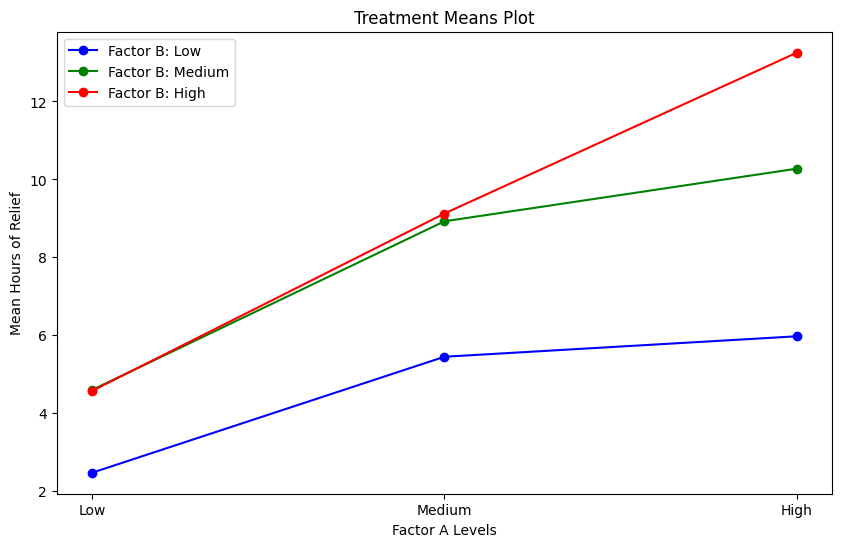

In [7]:
# calculate mean responses for each level of factors A and B
levels_A = np.unique(data[:, 1])
levels_B = np.unique(data[:, 2])

means = np.zeros((len(levels_A), len(levels_B)))

for i in range(len(levels_B)):
    for j in range(len(levels_A)):
        # Filter data for current combination of levels
        filtered_data = data[(data[:, 1] == levels_A[j]) & (data[:, 2] == levels_B[i])]

        # Calculate mean response
        mean_response = np.mean(filtered_data[:, 0])
        means[i, j] = mean_response

factor_B_levels = ["Low", "Medium", "High"]
factor_B_colors = ["blue", "green", "red"]

# Creating the plot
plt.figure(figsize=(10, 6))
for i in range(len(factor_B_colors)):
    plt.plot(
        factor_B_levels,
        means[i, :],
        marker="o",
        color=factor_B_colors[i],
        label=f"Factor B: {factor_B_levels[i]}",
    )

plt.xlabel("Factor A Levels")
plt.ylabel("Mean Hours of Relief")
plt.title("Treatment Means Plot")
plt.legend()
plt.show()

Based on the plot above, both factor A and factor B have main effects as well as interaction effects on the response.

**Main Effects**
1. Factor A: We see an upward trend as we move from low to high levels of Factor A. This suggests that higher levels of ingredient 1 are associated with more hours of relief, indicating that the Factor A has a main effect on response.
2. Factor B: Low and High levels of Factor B show different starting points and trends, indicating that the Factor B has a main effect on response.

**Interaction Effects**
1. All of the lines are not parallel, indicating that there is an interaction effect between the two factors.
2. Specifically, the difference between medium and high levels of factor B is higher at High levels of factor A. This suggests that, there is interaction between factor A and factor B.

#### 3.c
**Hypothesis:**
- Null Hypothesis (H0): There is no interaction between factors A and B. i.e $ (\alpha\beta)_{ij} = 0 $ for all $ i $ and $ j $.
- Alternate Hypothesis (H1): There is interaction between factors A and B. i.e $ (\alpha\beta)_{ij} \neq 0 $ for at least one combination of $ i $ and $ j $.

In [8]:
# fit the full model
full_model_results = linear_regression_with_reference(data)
full_model_rss = np.sum(full_model_results["residuals"] ** 2)
num_params_full = len(full_model_results["coefficients"])

# fit the reduced model
reduced_model_results = linear_regression_reduced_model(data)
reduced_model_rss = np.sum(reduced_model_results["residuals"] ** 2)
num_params_reduced = len(reduced_model_results["coefficients"])

# calculate F-statistic
n = len(data)
num_interactions = num_params_full - num_params_reduced

numerator = (reduced_model_rss - full_model_rss) / num_interactions
denominator = full_model_rss / (n - num_params_full)
f_statistic = numerator / denominator

# find p-value
p_value = 1 - stats.f.cdf(f_statistic, num_interactions, n - num_params_full)

print(f"F-statistic: {f_statistic}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject H0: Evidence of significant interaction effect.")
else:
    print("Fail to reject H0: No significant interaction effect detected.")

F-statistic: 122.22692307692303, P-value: 1.1102230246251565e-16
Reject H0: Evidence of significant interaction effect.


- From result of F-test above, we can see that p-value is less than 0.05.
- This means there is significant interaction effect between factors A and B.  Hence, we reject the null hypothesis.

#### 3.d
$$\mu_{23} = \mu + \alpha_2 + \beta_3 + (\alpha\beta)_{23} $$

In [9]:
# Fit the full model
results = linear_regression_with_reference(data)
coefficients = results["coefficients"]
mse = results["mse"]
X = results["design_matrix"]

# contrast vector for mu23
contrast_vector = np.array([1, 1, 0, 0, 1, 0, 1, 0, 0])

# estimate mu23
mu_23_estimate = calculate_contrast(coefficients, contrast_vector)

# standard error for mu23
se_mu_23 = calculate_contrast_standard_error(X, mse, contrast_vector)

# 95% confidence interval
z = stats.norm.ppf(0.975)
ci_lower = mu_23_estimate - z * se_mu_23
ci_upper = mu_23_estimate + z * se_mu_23

print(f"Value of baseline mu11: {coefficients[0]}")
print(f"Estimate of mu23: {mu_23_estimate}")
print(f"95% Confidence Interval for mu23: ({ci_lower}, {ci_upper})")

Value of baseline mu11: 2.4749999999999983
Estimate of mu23: 9.125000000000009
95% Confidence Interval for mu23: (8.884584260860109, 9.365415739139909)


- The estimate for $\mu_{23} = 9.125$ suggests that, on average the combination of 2nd level of Factor A and 3rd level of Factor B results in a response value of 9.125.
- Compared to the baseline value of $\mu_{11} = 2.47$, the significant increase shows presence of main effects or interaction effects of the factors on the response.

#### 3.e
$ L = \mu_{12} - \mu_{13} $

$ \mu{12} = \mu + \alpha_1 + \beta_2 + (\alpha\beta)_{12} $

$ \mu{13} = \mu + \alpha_1 + \beta_3 + (\alpha\beta)_{13} $

$ \alpha_1 =  0 $ (reference constraint)

$ (\alpha\beta)_{12} = (\alpha\beta)_{13} = 0 $ (reference constraint)

$ L = \beta_2 - \beta_3 $

In [10]:
# Fit the full model
results = linear_regression_with_reference(data)
coefficients = results["coefficients"]
mse = results["mse"]
X = results["design_matrix"]

# contrast vector for L
contrast_vector = np.array([0, 0, 0, 1, -1, 0, 0, 0, 0])

# estimate L
estimate = calculate_contrast(coefficients, contrast_vector)

# standard error for L
se = calculate_contrast_standard_error(X, mse, contrast_vector)

# 95% confidence interval
z = stats.norm.ppf(0.975)
ci_lower = estimate - z * se
ci_upper = estimate + z * se

print(f"Estimate of L: {estimate}")
print(f"95% Confidence Interval for L: ({ci_lower}, {ci_upper})")

Estimate of L: 0.025000000000001688
95% Confidence Interval for L: (-0.314999198899598, 0.36499919889960136)


- This contrast focuses on the difference between mean response for the second level of Factor B and the third level of Factor B while holding Factor A at its first level.
- The value of $0.025$ shows that there is no significant difference between the response when Factor A is low and Factor B is Medium or High.
- This is clearly seen in the treatment means plot between the Green and Red line when Factor A is low.

### Question 4
#### 4.a

In [11]:
data = np.array(
    [
    [73.0, 1, 1],
    [81.0, 1, 2],
    [92.0, 1, 3],
    [76.0, 2, 1],
    [78.0, 2, 2],
    [89.0, 2, 3],
    [75.0, 3, 1],
    [76.0, 3, 2],
    [87.0, 3, 3],
    [74.0, 4, 1],
    [77.0, 4, 2],
    [90.0, 4, 3],
    [76.0, 5, 1],
    [71.0, 5, 2],
    [88.0, 5, 3],
    [73.0, 6, 1],
    [75.0, 6, 2],
    [86.0, 6, 3],
    [68.0, 7, 1],
    [72.0, 7, 2],
    [88.0, 7, 3],
    [64.0, 8, 1],
    [74.0, 8, 2],
    [82.0, 8, 3],
    [65.0, 9, 1],
    [73.0, 9, 2],
    [81.0, 9, 3],
    [62.0, 10, 1],
    [69.0, 10, 2],
    [78.0, 10, 3]
], dtype=float)

A randomized complete block design is useful in this study for the following reasons:

1. **Control for Variability Among Blocks:** 
- The blocks are defined by the time elapsed since the auditors graduated from college. This factor is likely to influence their performance regardless of the training method used.
- By grouping auditors into blocks based on this criteria, the design controls for the variability among different experience levels.
- This means any differences observed within a block are due to the training methods rather than differences in experience.

2. **Increased Precision:**
- We can precisely estimate the effects of the training methods by removing the variability due to differences in experience levels.
- By comparing auditors within the same block, the experiment can isolate the effect of the training methods.

3. **Random Assignment Within Blocks:** 
- Each auditor within a block is randomly assigned to one of the training methods. This randomization helps to ensure that any other unmeasured factors are equally distributed across the training methods within each block. 
- This reduces the potential for these unmeasured factors to bias the results.

#### 4.b

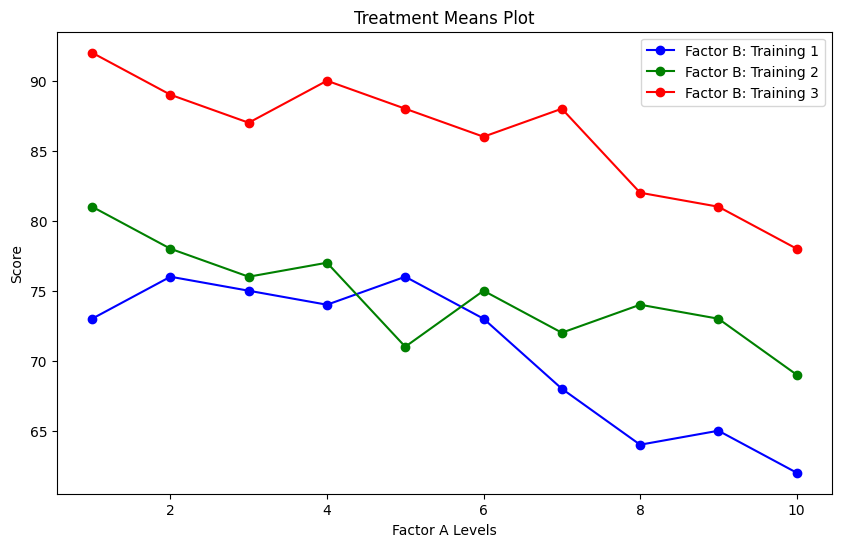

In [12]:
# filter responses for each level of factors A and B
levels_A = np.unique(data[:, 1])
levels_B = np.unique(data[:, 2])

means = np.zeros((len(levels_B), len(levels_A)))

for i in range(len(levels_B)):
    for j in range(len(levels_A)):
        means[i, j] = data[j*3+i, 0]

factor_B_levels = ["Training 1", "Training 2", "Training 3"]
factor_B_colors = ["blue", "green", "red"]

# Creating the plot
plt.figure(figsize=(10, 6))
for i in range(len(factor_B_colors)):
    plt.plot(
        levels_A,
        means[i, :],
        marker="o",
        color=factor_B_colors[i],
        label=f"Factor B: {factor_B_levels[i]}",
    )

plt.xlabel("Factor A Levels")
plt.ylabel("Score")
plt.title("Treatment Means Plot")
plt.legend()
plt.show()

In [13]:
# use block and method as categorical variables
df = pd.DataFrame(data, columns=["Score", "Block", "Method"])
df["Block"] = df["Block"].astype("category")
df["Method"] = df["Method"].astype("category")

# conduct turkey's HSD test
tukey = multi.pairwise_tukeyhsd(endog=df["Score"], groups=df["Method"], alpha=0.05)
print(tukey.summary())

# turkey_plot = tukey.plot_simultaneous()
# plt.show()

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0      4.0 0.1341 -0.9849  8.9849  False
   1.0    3.0     15.5    0.0 10.5151 20.4849   True
   2.0    3.0     11.5    0.0  6.5151 16.4849   True
----------------------------------------------------


**Hypothesis**
- Null Hypothesis (H0): There is no difference in the mean performance scores for the three training methods. i.e $ \mu_1 = \mu_2 = \mu_3 $. <br>
Method of training does not significantly affect the performance scores of the auditors.

- Alternate Hypothesis (H1): There is a significant difference in the mean scores between at least two of the training methods.<br>
Method of training does affect the proficiency scores.

From the Turkey HSD test results above,
1. Comparison between Method 1 and Method 2:
    - Mean difference: 4.0
    - p-value: 0.1341
    - Reject null-hypothesis: False
    - Conclusion: There is no significant difference in the mean scores between Method 1 and Method 2. 
    - The null hypothesis cannot be rejected.
<br><br>
2. Comparison between Method 1 and Method 3:
    - Mean difference: 15.5
    - p-value: 0
    - Reject null-hypothesis: True
    - Conclusion: There is statistically significant difference in mean scores between Method 1 and Method 3. The difference in in favor of Method 3, suggesting that it is significantly better than Method 1.
    - Null hypothesis is rejected for this pair.
<br><br>
3. Comparison between Method 2 and Method 3:
    - Mean difference: 11.5
    - p-value: 0
    - Reject null-hypothesis: True
    - Conclusion: There is statistically significant difference in mean scores between Method 2 and Method 3. The difference in in favor of Method 3, suggesting that it is significantly better than Method 2.
    - Null hypothesis is rejected for this pair.

In conclusion, the training sessions conducted in Chicago by National Staff (Method 3) is significantly more effective than both study-at-home (Method 1) and training by local staff (Method 2).

There is no significant difference in effectiveness between Method 1 and Method 2.

#### 4.c

In [14]:
# use block and method as categorical variables
df = pd.DataFrame(data, columns=["Score", "Block", "Method"])
df["Block"] = df["Block"].astype("category")
df["Method"] = df["Method"].astype("category")

additive_model = ols("Score ~ C(Block) + C(Method)", data=df).fit()
print(additive_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     25.18
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.11e-08
Time:                        21:53:33   Log-Likelihood:                -62.372
No. Observations:                  30   AIC:                             148.7
Df Residuals:                      18   BIC:                             165.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           75.5000      1.580  

**Model Summary**
- R-Squared = 0.939: The value is high, indicating that the model explains about 94% of the variability in the response.
- Adjusted R-squared = 0.902: The value is high, accounting for number of predictors in the model, indicating that this model is a good fit.
- F-statistic = 25.18: Significant value indicating that the model is statistically significant.

**Coefficient Summary**:
1. Intercept = 75.5: Estimated mean score for the baseline category (Method 1, Block 1) before the effects of other methods and blocks are taken into account.

2. Method 2 (Coefficient = 4.000):  Method 2 increases the score by 4 points, holding the block constant.

3. Method 3 (Coefficient = 15.500): Method 3 increases the score by 15.5 points, holding the block constant.

4. Blocks 2 to 10 Coefficients: These represent the differences in mean scores for each block compared to Block 1. Most of these are negative, indicating that the scores decrease with increasing time since graduation.

**Conclusion**:
- The model strongly suggests that the method of training has a significant impact on the scores, with Method 3 being the most effective (highest coefficient).
- The trend of decreasing scores with increasing time since graduation shows that more recently graduated auditors perform better in this training context.
- The additive model fits the data well, explaining a large portion of the variability in scores.

#### 4.d

In [15]:
# use block and method as categorical variables
df = pd.DataFrame(data, columns=["Score", "Block", "Method"])
df["Block"] = df["Block"].astype("category")
df["Method"] = df["Method"].astype("category")

# fit the model
additive_model = ols("Score ~ C(Block) + C(Method)", data=df).fit()

# co-efficient for method 2
coef_diff = additive_model.params["C(Method)[T.2.0]"]

# confidence interval for method 2
conf_int = additive_model.conf_int().loc["C(Method)[T.2.0]"]

ci_low, ci_high = conf_int
width_ci = ci_high - ci_low
print(f"Lower bound: {ci_low}, Upper bound: {ci_high}")
print(f"Width of the confidence interval: {width_ci}")

Lower bound: 1.6528383237838713, Upper bound: 6.347161676216112
Width of the confidence interval: 4.6943233524322405


The 95% confidence interval for the difference in mean scores between Method 1 and Method 2 is (1.65 - 6.35).

Width of CI = 4.69

1. This interval suggests that on an average, Method 2 increases the score by 1.65 to 6.35 points in comparison with Method 1.
2. Since the entire interval is above 0, Method 2 is likely to be more effective than Method 1 on average.

#### 4.e

In [16]:
# use block and method as categorical variables
df = pd.DataFrame(data, columns=["Score", "Block", "Method"])
df["Block"] = df["Block"].astype("category")
df["Method"] = df["Method"].astype("category")

# fit the model
model_no_block = ols("Score ~ C(Method)", data=df).fit()

# co-efficient for method 2
coef_diff = model_no_block.params["C(Method)[T.2.0]"]

# confidence interval for method 2
conf_int = model_no_block.conf_int().loc["C(Method)[T.2.0]"]

ci_low, ci_high = conf_int
width_ci = ci_high - ci_low
print(f"Lower bound: {ci_low}, Upper bound: {ci_high}")
print(f"Width of the confidence interval: {width_ci}")

Lower bound: -0.12526239002410122, Upper bound: 8.12526239002414
Width of the confidence interval: 8.250524780048242


95% Confidence interval for difference between Method 1 and Method 2 when using a model with no blocks: (-0.13 - 8.13)

Width of CI = 8.25

**Comparison of Confidence Interval Widths:**
- With Blocking: (1.65 - 6.35), Width = 4.69.
- Without Blocking: (-0.13 - 8.13), Width = 8.25
- The CI for difference without a blocking model is significantly higher compared to a model with blocking.
- This increased width shows the uncertainty in difference due to the variability due to the time elapsed since graduation.

**Interpretation:**
1. The increased width in CI shows the uncertainty in the difference between Method 1 and Method 2 when blocking is not considered. This is because of the induced variability due to the time elapsed since graduation.
2. The wider interval includes negative values and 0 - indicating that without considering a blocking model, we cannot be confident about the difference between Methods 1 and 2

In conclusion, blocking by time since graduation helps us to isolate the effect of training method on the scores, and reduces the uncertainty in the difference between methods.

#### 4.f

In [17]:
# use block and method as categorical variables
df = pd.DataFrame(data, columns=["Score", "Block", "Method"])
df["Block"] = df["Block"].astype("category")
df["Method"] = df["Method"].astype("category")

# remove method 3
df = df[df["Method"] != 3]

# fit the model
no_method3_model = ols("Score ~ C(Block) + C(Method)", data=df).fit()

# co-efficient for method 2
coef_diff = no_method3_model.params["C(Method)[T.2.0]"]

# confidence interval for method 2
conf_int = no_method3_model.conf_int().loc["C(Method)[T.2.0]"]

ci_low, ci_high = conf_int
width_ci = ci_high - ci_low
print(f"Lower bound: {ci_low}, Upper bound: {ci_high}")
print(f"Width of the confidence interval: {width_ci}")

Lower bound: 0.8365727356876564, Upper bound: 7.163427264312286
Width of the confidence interval: 6.326854528624629


95% Confidence interval for difference between Method 1 and Method 2 when using a model without method 3: (0.84, 7.16)

Width of CI = 6.33

**Comparison of Confidence Interval Widths:**
- With method 3: (1.65 - 6.35), Width = 4.69.
- Without method 3: (0.84 - 7.16), Width = 6.33
- The CI for difference is higher when compared to a model with method 3.

**Interpretation:**
- The increase in CI width shows greater uncertainty in the estimate of difference between Model 1 and Model 2,
- This could be due to reduction in the overall sample size, the reduction in variability that Method 3 might have been contributing to the model.
- The results show the importance of considering all relevant data in an analysis, excluding significant portions can impact the precision and reliability of the findings.

This comparison shows that inclusion or exclusion of certain levels of a factor can have a significant impact on the results of an analysis. Removing a method with a distinct effect can lead to less precise estimates for the remaining methods.